In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mintpy
import gdal
from mintpy.utils import plot as pp
from mintpy.utils import readfile, utils as ut, plot as pp
import h5py
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mintpy import view
from mintpy.objects import timeseries
from operator import itemgetter 
import datetime
from datetime import timedelta
from scipy import interpolate
import matplotlib.dates as mdates
from minopy.objects.invert_pixel import process_pixel 
from scipy import stats
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
font = {'family' : 'DejaVu Sans',
        'size'   : 15}

In [7]:
project_dir = './Miami_data'
out_dir = './out_figures'
#os.chdir(project_dir)

out_amplitude = project_dir + '/mean_amplitude'


reflat = 25.8791
reflon = -80.1259

#from isceobj.Util.ImageUtil import ImageLib as IML

#if not os.path.exists(out_amplitude):
    
#    slc_stack = project_dir + '/slcStack.h5'

#    amplitude = np.flipud(np.abs(readfile.read(slc_stack, datasetName='slc')[0]))
#    amplitude = np.mean(amplitude[:, :, :], axis=0)
    
#    am_memmap = np.memmap(out_amplitude, mode='write', dtype='float32', shape=amplitude.shape)
#    am_memmap[:, :] = amplitude[:, :]
#    IML.renderISCEXML(out_amplitude, bands=1, nyy=amplitude.shape[0], nxx=amplitude.shape[1],
#                                      datatype='float32', scheme='BIL')
#    del am_memmap

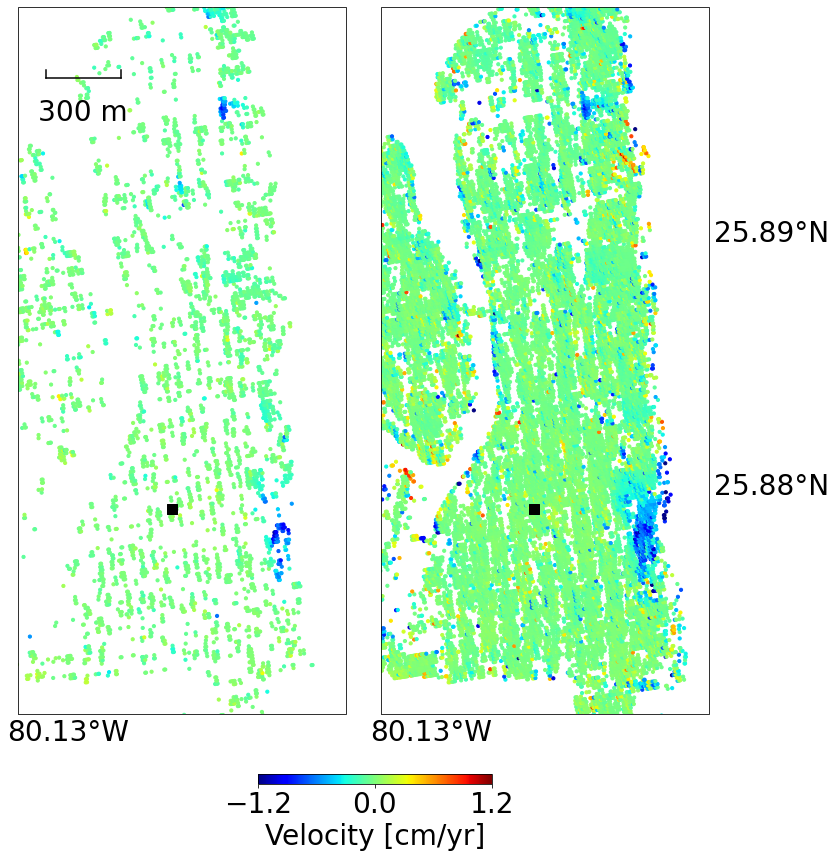

In [10]:

plt.rcParams["font.size"] = "28"


factor = [1.5]

geom_mud2 = project_dir + '/org_geometry/geometryRadar.h5'
data_mud2 = project_dir + '/velocity.h5'
mask_tem_file = project_dir + '/maskTempCoh.h5'
mask_ps_file = project_dir + '/maskPS.h5'
watermask_file = project_dir + '/waterMask.h5'
tcoh_file = project_dir + '/temporalCoherence.h5'

latitude = readfile.read(geom_mud2, datasetName='latitude')[0]
longitude = readfile.read(geom_mud2, datasetName='longitude')[0]
velocity = readfile.read(data_mud2, datasetName='velocity')[0]*100
mask_w = readfile.read(watermask_file, datasetName='mask')[0]
tempCoh = readfile.read(tcoh_file, datasetName='temporalCoherence')[0]*mask_w
mask_t = mask_w
mask_t[tempCoh<0.6] = 0

mask_t = readfile.read(mask_tem_file, datasetName='mask')[0]*mask_w
mask_p = readfile.read(mask_ps_file, datasetName='mask')[0]*mask_w


fig, axs = plt.subplots(nrows=1, ncols=2, 
                        figsize=(13,13), subplot_kw=dict(projection=ccrs.PlateCarree()))


mask = mask_t
## Plot Pichincha

box = ['25.871:25.899','-80.132:-80.119']
#box = ['25.85:25.90','-80.144:-80.118']


lat = [float(i) for i in box[0].split(':')]
lon = [float(i) for i in box[1].split(':')]

ax = axs[1]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())

im=ax.scatter(longitude[mask==1], latitude[mask==1], 
           c=velocity[mask==1], s=10, cmap='jet', vmin=-1.2, vmax=1.2); 

ax.scatter(reflon, reflat,marker="s", color='black', s=100); 

#cbar_top = fig.colorbar(im, ax=ax, orientation='horizontal', shrink=0.28, pad=0.08) #, cax=cax_top)
#cbar_top.set_ticks([-1, 0, 1])
#cbar_top.set_label('cm/y')


gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right = True
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-80.13])
gl.ylocator = mticker.FixedLocator([25.88, 25.89])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


ax = axs[0]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
mask = mask_p
ax.scatter(longitude[mask==1], latitude[mask==1], 
           c=velocity[mask==1], s=10, cmap='jet', vmin=-1.2, vmax=1.2); 

ax.scatter(reflon, reflat,marker="s", color='black', s=100); 

geo_box = (lon[0], lat[0], lon[1], lat[1])
pp.draw_scalebar(ax, geo_box, unit='degrees', loc=[0.2, 0.2, 0.1], labelpad=0.05, color='k', font_size=28)

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-80.13])
gl.ylocator = mticker.FixedLocator([25.88, 25.89])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


cbar_ax = fig.add_axes([0.40, 0.05, 0.25, 0.01])
fig.colorbar(im, cax=cbar_ax, ticks=[-1.2,0,1.2], label='Velocity [cm/yr]', orientation='horizontal')

fig.subplots_adjust(hspace=0.02, wspace=0.001)


plt.savefig(out_dir +'/miam_map.png', bbox_inches='tight', dpi=300) 
plt.show()

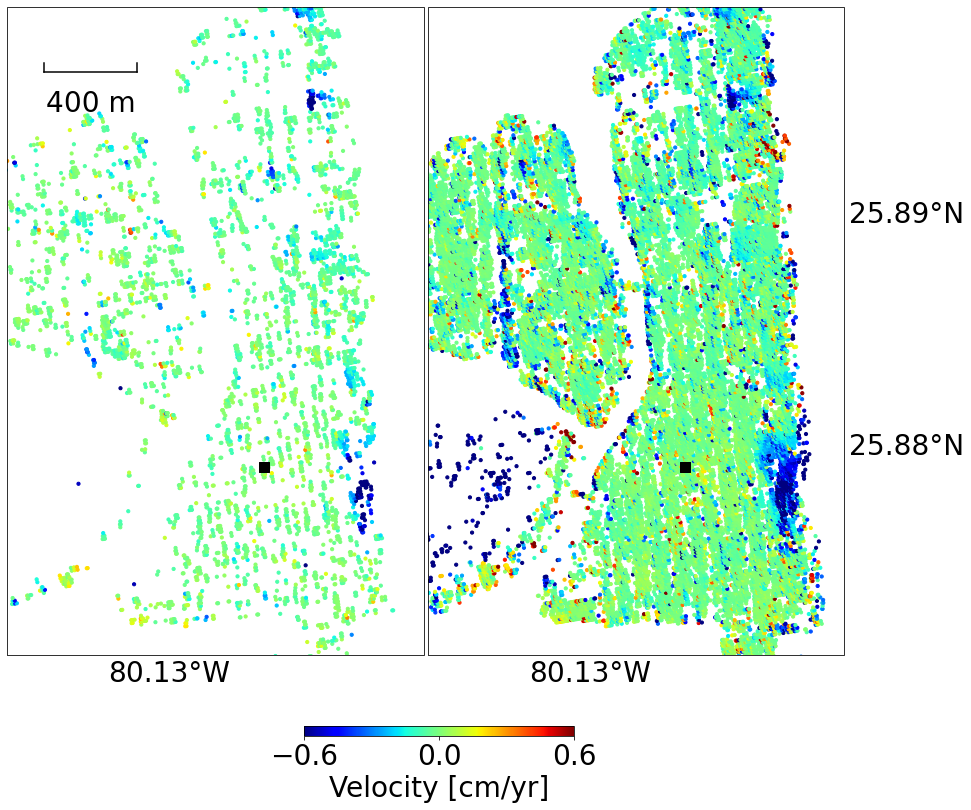

In [12]:
plt.rcParams["font.size"] = "28"

factor = 0.6

geom_mud2 = project_dir + '/org_geometry/geometryRadar.h5'
data_mud2 = project_dir + '/velocity.h5'
mask_tem_file = project_dir + '/maskTempCoh.h5'
mask_ps_file = project_dir + '/maskPS.h5'
watermask_file = project_dir + '/waterMask.h5'


tcoh_file = project_dir + '/temporalCoherence.h5'

latitude = readfile.read(geom_mud2, datasetName='latitude')[0]
longitude = readfile.read(geom_mud2, datasetName='longitude')[0]
velocity = readfile.read(data_mud2, datasetName='velocity')[0]*100
mask_w = readfile.read(watermask_file, datasetName='mask')[0]
tempCoh = readfile.read(tcoh_file, datasetName='temporalCoherence')[0]*mask_w
mask_t = mask_w
mask_t[tempCoh<0.6] = 0

mask_t = readfile.read(mask_tem_file, datasetName='mask')[0]*mask_w
mask_p = readfile.read(mask_ps_file, datasetName='mask')[0]*mask_w


fig, axs = plt.subplots(nrows=1, ncols=2, 
                        figsize=(15,13), subplot_kw=dict(projection=ccrs.PlateCarree()))


mask = mask_t
## Plot Pichincha

box = ['25.871:25.899','-80.137:-80.119']
#box = ['25.85:25.90','-80.144:-80.118']


lat = [float(i) for i in box[0].split(':')]
lon = [float(i) for i in box[1].split(':')]

ax = axs[1]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())

im=ax.scatter(longitude[mask==1], latitude[mask==1], 
           c=velocity[mask==1], s=10, cmap='jet', vmin=-factor, vmax=factor); 

ax.scatter(reflon, reflat,marker="s", color='black', s=100); 



gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right = True
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-80.13])
gl.ylocator = mticker.FixedLocator([25.88, 25.89])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


ax = axs[0]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
mask = mask_p
ax.scatter(longitude[mask==1], latitude[mask==1], 
           c=velocity[mask==1], s=10, cmap='jet', vmin=-factor, vmax=factor); 

ax.scatter(reflon, reflat,marker="s", color='black', s=100); 
geo_box = (lon[0], lat[0], lon[1], lat[1])
pp.draw_scalebar(ax, geo_box, unit='degrees', loc=[0.2, 0.2, 0.1], labelpad=0.05, color='k', font_size=28)

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-80.13])
gl.ylocator = mticker.FixedLocator([25.88, 25.89])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


cbar_ax = fig.add_axes([0.40, 0.07, 0.25, 0.01])
fig.colorbar(im, cax=cbar_ax, ticks=[-factor,0,factor], label='Velocity [cm/yr]', orientation='horizontal')

fig.subplots_adjust(hspace=0.02, wspace=0.01)


plt.savefig(out_dir +'/miam_map_sup.png', bbox_inches='tight', dpi=300) 
plt.show()

In [6]:
def get_data_ps(ymin, ymax, xmin, xmax, out_amplitude, shift=0):

    vel_file = project_dir + '/velocity.h5'
    geo_file = project_dir + '/org_geometry/geometryRadar.h5'
    mask_file_t = project_dir + '/maskTempCoh.h5'
    mask_file_ps = project_dir + '/maskPS.h5'
    mask_file_w = project_dir + '/waterMask.h5'
    amp_dips_indx_file = project_dir + '/amp_dipersion_index'
    top_eigenvalues_file = project_dir + '/top_eigenvalues'
    shp_file = project_dir + '/phase_series.h5'

    
    amd_memmap = gdal.Open(amp_dips_indx_file + '.vrt', gdal.GA_ReadOnly)
    Amp_dips_indx = np.flipud(amd_memmap.GetRasterBand(1).ReadAsArray()[ymin:ymax, xmin:xmax]) # , xmax-xmin, ymax-ymin))
    
    with h5py.File(shp_file, 'r') as ds:
        shp = np.flipud(ds['shp'][ymin:ymax, xmin:xmax])
        

    top_memmap = gdal.Open(top_eigenvalues_file + '.vrt', gdal.GA_ReadOnly)
    Top_eigenvalues = np.flipud(top_memmap.GetRasterBand(1).ReadAsArray()[ymin:ymax, xmin:xmax]) # , xmax-xmin, ymax-ymin))
    Top_eigenvalues_percent = np.flipud(top_memmap.GetRasterBand(3).ReadAsArray()[ymin:ymax, xmin:xmax])
    
    mask_t = np.flipud(readfile.read(mask_file_t, datasetName='mask')[0][ymin:ymax, xmin:xmax])
    mask_p = np.flipud(readfile.read(mask_file_ps, datasetName='mask')[0][ymin:ymax, xmin:xmax])
    mask_w = np.flipud(readfile.read(mask_file_w, datasetName='mask')[0][ymin:ymax, xmin:xmax])
    
    mask = shp < 10

    DEM = np.flipud(readfile.read(geo_file, datasetName='height')[0][ymin:ymax, xmin:xmax]) + shift


    velocity = np.flipud(readfile.read(vel_file, datasetName='velocity')[0][ymin:ymax, xmin:xmax])
  
    am_memmap = gdal.Open(out_amplitude + '.vrt', gdal.GA_ReadOnly)
    amplitude = np.flipud(am_memmap.GetRasterBand(1).ReadAsArray()[ymin:ymax, xmin:xmax]) # , xmax-xmin, ymax-ymin))

    velocity[mask_w==0] = np.nan
 
    DEM[mask_w==0] = np.nan

    Amp_dips_indx[mask_w==0] = np.nan
    Top_eigenvalues[mask_w==0] = np.nan
    Top_eigenvalues_percent[mask_w==0] = np.nan
     
    vel = velocity[mask==1]*1000

    amp_dips_indx = Amp_dips_indx[mask==1]
    top_eigenvalues = Top_eigenvalues[mask==1]
    top_eigenvalues_percent = Top_eigenvalues_percent[mask==1]
    
    
    x = np.linspace(0, velocity.shape[1]-1, velocity.shape[1])
    y = np.linspace(0, velocity.shape[0]-1, velocity.shape[0])
    x, y = np.meshgrid(x, y)

    xv = x[mask==1]
    yv = y[mask==1]
    
    return amplitude, xv, yv, vel, DEM, amp_dips_indx, top_eigenvalues, top_eigenvalues_percent, shp


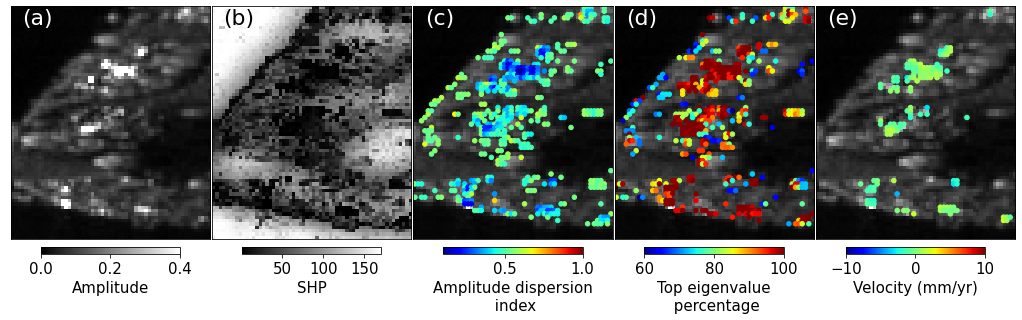

In [7]:
plt.rcParams["font.size"] = "15"

amplitude, xv, yv, vel, dem, amp_dips_indx, top_eigenvalues, top_eigenvalues_percent, shp  = get_data_ps(310, 380, 900, 960, out_amplitude, 26)
amplitude = (amplitude - np.nanmin(amplitude))/(np.nanmax(amplitude) - np.nanmin(amplitude))

mask = (amp_dips_indx<0.42) *(top_eigenvalues_percent>95)

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(18, 8))

ax = axs[4]
ax.imshow(amplitude, cmap='gray', vmin=0, vmax=0.4)
im = ax.scatter(xv[mask], yv[mask], c=vel[mask], s=20, cmap='jet', vmin=-10, vmax=10); 
cbar = plt.colorbar(im, ax=ax, shrink=0.7, orientation='horizontal', pad=0.02)

cbar.set_label('Velocity (mm/yr)')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.text(3,5, '(e)', color='w', fontsize=22)


mask = (amp_dips_indx<0.4) #*(top_eigenvalues_percent>90)

ax = axs[0]
im = ax.imshow(amplitude, cmap='gray', vmin=0, vmax=0.4)
#im = ax.scatter(xv[mask], yv[mask], c=vel[mask], s=10, cmap='jet', vmin=-15, vmax=15); 
cbar = plt.colorbar(im, ax=ax, shrink=0.7, orientation='horizontal', pad=0.02)

cbar.set_label('Amplitude')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.text(3,5, '(a)', color='w', fontsize=22)



ax = axs[2]
ax.imshow(amplitude, cmap='gray', vmin=0, vmax=0.4)
im = ax.scatter(xv, yv, c=amp_dips_indx, s=20, cmap='jet', vmin=0.1, vmax=1); 
cbar = plt.colorbar(im, ax=ax, shrink=0.7, orientation='horizontal', pad=0.02)

cbar.set_label('Amplitude dispersion\n index')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.text(3,5, '(c)', color='w', fontsize=22)


ax = axs[3]
ax.imshow(amplitude, cmap='gray', vmin=0, vmax=0.4)
im = ax.scatter(xv, yv, c=top_eigenvalues_percent, s=20, cmap='jet', vmin=60, vmax=100); 
cbar = plt.colorbar(im, ax=ax, shrink=0.7, orientation='horizontal', pad=0.02)

cbar.set_label('Top eigenvalue\n percentage')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.text(3,5, '(d)', color='w', fontsize=22)


ax = axs[1]
im = ax.imshow(shp, cmap='gray')
#im = ax.scatter(xv[mask], yv[mask], c=vel[mask], s=10, cmap='jet', vmin=-15, vmax=15); 
cbar = plt.colorbar(im, ax=ax, shrink=0.7, orientation='horizontal', pad=0.02)

cbar.set_label('SHP')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.text(3,5, '(b)', color='k', fontsize=22)


fig.subplots_adjust(hspace=0, wspace=0.01)

plt.savefig(out_dir +'/ps_analysis_different_criteria.png', bbox_inches='tight', dpi=300) 



In [11]:
ymin=300; ymax=450; xmin=1000; xmax=1200
ymin=303; ymax=327; xmin=1405; xmax=1432

vel_file = project_dir + '/velocity.h5'
geo_file = project_dir + '/geometryRadar.h5'
tcoh_file = project_dir + '/temporalCoherence.h5'
mask_file_t = project_dir + '/maskTempCoh.h5'
mask_file_ps = project_dir + '/maskPS.h5'
mask_file_w = project_dir + '/waterMask.h5'
am_memmap = gdal.Open(out_amplitude + '.vrt', gdal.GA_ReadOnly)
amplitude = np.flipud(am_memmap.GetRasterBand(1).ReadAsArray()[ymin:ymax, xmin:xmax]) # , xmax-xmin, ymax-ymin))



mask_w = np.flipud(readfile.read(mask_file_w, datasetName='mask')[0][ymin:ymax, xmin:xmax])
temp_coh = np.flipud(readfile.read(tcoh_file, datasetName='temporalCoherence')[0][ymin:ymax, xmin:xmax])
mask_t = np.flipud(readfile.read(mask_file_t, datasetName='mask')[0][ymin:ymax, xmin:xmax])*mask_w
mask_p = np.flipud(readfile.read(mask_file_ps, datasetName='mask')[0][ymin:ymax, xmin:xmax])*mask_w
velocity  = np.flipud(readfile.read(vel_file, datasetName='velocity')[0][ymin:ymax, xmin:xmax])*100


x = np.linspace(0, velocity.shape[1]-1, velocity.shape[1])
y = np.linspace(0, velocity.shape[0]-1, velocity.shape[0])
x, y = np.meshgrid(x, y)

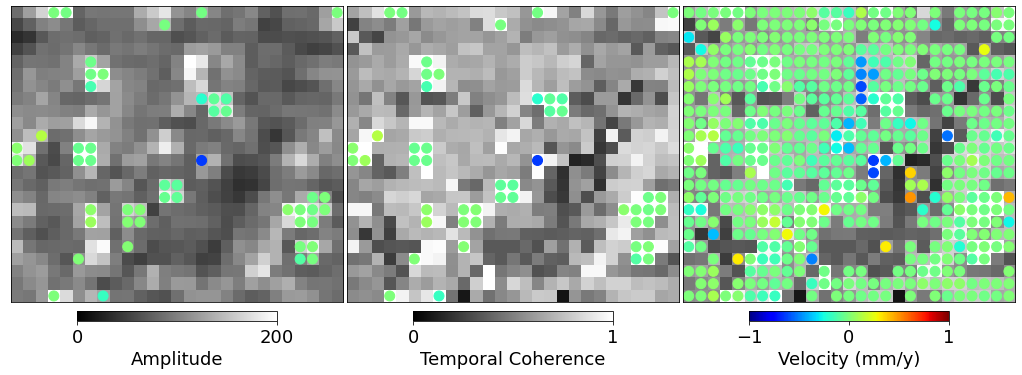

In [27]:
plt.rcParams["font.size"] = "18"

scale=10
scale=100

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))

ax = axs[2]
#ax.imshow(amplitude, cmap='gray', vmin=0, vmax=200)
ax.imshow(temp_coh, cmap='gray', vmin=0, vmax=1, alpha=1)
im = ax.scatter(x[mask_t==1], y[mask_t==1], c=velocity[mask_t==1], s=scale, cmap='jet', vmin=-1, vmax=1); 
cbar = plt.colorbar(im, ax=ax, shrink=0.6,  ticks=[-1, 0,1], orientation='horizontal', pad=0.02)

cbar.set_label('Velocity (mm/y)')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
#ax.text(3,5, '(e)', color='w', fontsize=22)

#ax.text(10,30, '(c)')


ax = axs[1]
#ax.imshow(amplitude, cmap='gray', vmin=0, vmax=0.4)
im1 = ax.imshow(temp_coh, cmap='gray', vmin=0, vmax=1, alpha=1)
im = ax.scatter(x[mask_p==1], y[mask_p==1], c=velocity[mask_p==1], s=scale, cmap='jet', vmin=-1, vmax=1); 

cbar = plt.colorbar(im1, ax=ax, shrink=0.6,  ticks=[0, 1], orientation='horizontal', pad=0.02)
cbar.set_label('Temporal Coherence')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

#ax.text(10,30, '(b)')

ax = axs[0]
im=ax.imshow(amplitude, cmap='gray', vmin=0, vmax=200)
#im = ax.imshow(temp_coh, cmap='gray', vmin=0, vmax=1)
ax.scatter(x[mask_p==1], y[mask_p==1], c=velocity[mask_p==1], s=scale, cmap='jet', vmin=-1, vmax=1, alpha=1); 
cbar = plt.colorbar(im, ax=ax, shrink=0.6, ticks=[0,200], orientation='horizontal', pad=0.02)

#cbar.set_label('Temporal Coherence')
cbar.set_label('Amplitude')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

#ax.text(10,30, '(a)', color='w')

fig.subplots_adjust(hspace=0, wspace=0.01)

#plt.savefig(out_dir +'/ps_isolated_unwrap_error.png', bbox_inches='tight', dpi=300) 
plt.savefig(out_dir +'/ps_isolated_unwrap_error2.png', bbox_inches='tight', dpi=300) 
